# CSE351 Quiz 4
## Time 40 minutes

### Complete the quiz in this jupyter file and submit .



You are given 70,000 images (each image consists of 28*28 pixels) of hand-written digits from 0-9.
The task is to design a classifier that can recognize these images. In other words, you input an image from this dataset and the output is a predicted number from 0 to 9.

For this problem, we only focus on classification task between two digits: 3, and 8, meaning that you deal with a binary classification task. ** If you trian the classifier for all digits you won't ger any credit.**


The dataset contains 60,000 images for training and 10,000 for test. 
Do the following:
1. Extract all images contaning digits 3 and 8 both in training and test data set.
2.	Plot an image of the digit 3  and an image of digit 8 from the training data. It could be any image of digit 3 or 8.
3.	Train a feedforward neural network with the following architecture: 
    - Three layers
    -	256 hidden units
    -	feedforward
    -   number of epoch = 10
4.	Print out the accuracy of your model for each epoch both for the test and train sets
5.	Report the classification results using a confusion matrix



In [3]:
# Here are othe required libraries. You are welconme to add more if you need
import numpy as np
import pandas as pd
import sklearn 
from sklearn import datasets
import scipy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import itertools
import tensorflow as tf
from sklearn.metrics import confusion_matrix


# This function loads the images and their labels.  The loading time should be around 4 seconds.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


print("the array is = ",x_train.shape)
# this would print out : the array is =  (60000, 28, 28) meaning you have 60,000 images and each image is 28 by 28 images.


the array is =  (60000, 28, 28)


Note :
1. The training dataset contains all the training images in the array format as X(`train_x`) and all the labels are there in `train_y`

In [4]:
# Lets explore what is there in train_y
print("Image showing Digit : {} is present in x_train[{}]".format(y_train[5],5))
print("Image showing Digit : {} is present in x_train[{}]".format(y_train[1],1))

Image showing Digit : 2 is present in x_train[5]
Image showing Digit : 0 is present in x_train[1]


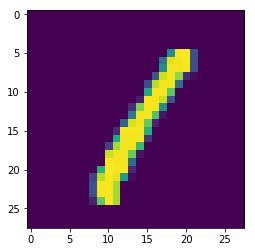

In [21]:
# print(y_train[1])
plt.imshow(x_train[3].reshape(28, 28))
# print(x_train.shape)

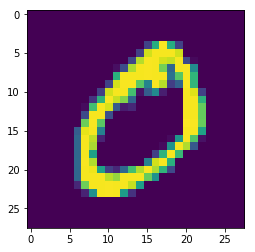

In [24]:
plt.imshow(x_train[1].reshape(28, 28))


In [25]:
# TA Comments
# I am posting the solution with the use of Keras framework here
# I will post version from lecture slide 14 later.

In [26]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(x_train.shape)? (<ipython-input-26-e45311219858>, line 3)

In [27]:
#Q1.1 Extract all images contaning digits 3 and 8 both in training 
#     and test data set.

In [28]:
x_test[y_test==3.0].shape

(1010, 28, 28)

In [29]:
only_digit_3_train_x = x_train[y_train==3.0]
only_digit_3_train_y = y_train[y_train==3.0]
only_digit_3_test_x = x_test[y_test==3.0]
only_digit_3_test_y = y_test[y_test==3.0]

In [30]:
only_digit_8_train_x = x_train[y_train==8.0]
only_digit_8_train_y = y_train[y_train==8.0]
only_digit_8_test_x = x_test[y_test==8.0]
only_digit_8_test_y = y_test[y_test==8.0]

In [31]:
only_digit_3_train_x.shape,only_digit_3_test_x.shape

((6131, 28, 28), (1010, 28, 28))

In [32]:
only_digit_8_train_x.shape,only_digit_8_test_x.shape

((5851, 28, 28), (974, 28, 28))

In [33]:
6131+5851

11982

In [34]:
1010+974

1984

In [35]:
assert only_digit_8_train_x.shape[0]==5851
assert only_digit_8_test_x.shape[0]==974

In [36]:
assert only_digit_3_train_x.shape[0]==6131
assert only_digit_3_test_x.shape[0]==1010

In [37]:
#Q1.2 Plot an image of the digit 3 and an image of digit 8 from the training data. 
# It could be any image of digit 3 or 8..

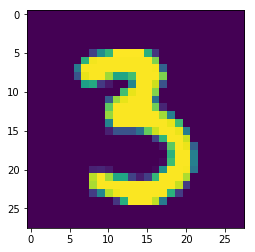

In [38]:
# ANY RANDOM INDEX --> 33
plt.imshow(only_digit_3_train_x[33].reshape(28, 28))

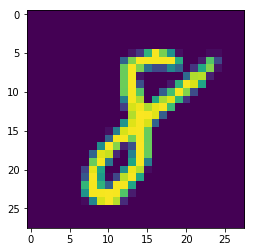

In [39]:
# ANY RANDOM INDEX --> 14
plt.imshow(only_digit_8_train_x[14].reshape(28, 28))

## Q1.3. Important
For this problem, we only focus on classification task between two digits: 3, and 8, meaning that you deal with a binary classification task. 
**If you train the classifier for all digits you won't ger any credit.**

Q1 [Continued]
3.	Train a feedforward neural network with the following architecture: 
    - Three layers
    -	256 hidden units
    -	feedforward
    -   number of epoch = 10
4.	Print out the accuracy of your model for each epoch both for the test and train sets
5.	Report the classification results using a confusion matrix

In [40]:
only_digit_3_train_x.shape[0]+only_digit_8_train_x.shape[0]

11982

In [41]:
np.concatenate([only_digit_3_train_x,only_digit_8_train_x]).shape

(11982, 28, 28)

In [42]:
train_data_x = np.concatenate([only_digit_3_train_x,
                               only_digit_8_train_x])

In [43]:
train_data_y = np.concatenate([only_digit_3_train_y,
                               only_digit_8_train_y])

In [44]:
test_data_x = np.concatenate([only_digit_3_test_x,
                              only_digit_8_test_x])

In [45]:
test_data_y = np.concatenate([only_digit_3_test_y,
                               only_digit_8_test_y])

In [46]:
print("Train X Shape",train_data_x.shape)
print("Train Y Shape",train_data_y.shape)
print("Test X Shape",test_data_x.shape)
print("Test Y Shape",test_data_y.shape)

Train X Shape (11982, 28, 28)
Train Y Shape (11982,)
Test X Shape (1984, 28, 28)
Test Y Shape (1984,)


# Classification model

#### Using keras framework

In [47]:
import keras
from keras.models import Sequential
from keras import regularizers
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [48]:
import tensorflow as tf

In [49]:
tf.reset_default_graph()

In [66]:
train_data_x = train_data_x/255.0
test_data_x = test_data_x/255.0

In [67]:
from keras.utils import np_utils

In [68]:
train_data_y = np_utils.to_categorical(train_data_y)
test_data_y = np_utils.to_categorical(test_data_y)

In [69]:
train_data_x.shape,test_data_x.shape

((11982, 28, 28), (1984, 28, 28))

In [70]:
train_data_y.shape,test_data_y.shape

((11982, 9, 2), (1984, 9, 2))

In [71]:
model = Sequential()
model.add(Dense(100, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(train_data_y.shape[1], activation='softmax'))

In [72]:
model.compile(optimizer='adam', 
                    loss='binary_crossentropy',
             metrics=['accuracy'])

In [73]:
from keras.callbacks import Callback
class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        print("=-------=")
        print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))
        print("=-------=")

In [74]:
# Training step

In [75]:
y_classes = [np.argmax(y, axis=None, out=None) for y in test_data_y]

In [84]:
#y_classes
test_data_x.reshape(test_data_x.shape[0], 784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [85]:
model.fit(train_data_x, train_data_y, 
          callbacks=[TestCallback((test_data_x, test_data_y))],
         epochs=10, shuffle=True)

ValueError: Error when checking input: expected dense_4_input to have 2 dimensions, but got array with shape (11982, 28, 28)

#### Report the classification results using a confusion matrix

In [42]:
model.predict(test_data_x)

array([[2.3818317e-05, 2.2985789e-05, 1.9408953e-05, ..., 1.8835424e-05,
        2.1528545e-05, 5.2566153e-01],
       [1.5843275e-06, 1.7403155e-06, 1.3283305e-06, ..., 1.1881012e-06,
        1.5057757e-06, 5.3227943e-01],
       [1.8159836e-04, 1.7971262e-04, 1.5987820e-04, ..., 1.4721396e-04,
        1.6415560e-04, 5.0433964e-01],
       ...,
       [1.1331223e-05, 9.7221573e-06, 8.8735096e-06, ..., 7.9101965e-06,
        1.0900820e-05, 6.9226199e-01],
       [3.8198434e-23, 5.2805335e-24, 1.5462557e-23, ..., 5.0594643e-24,
        1.5012973e-23, 9.9999976e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [43]:
test_data_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [44]:
def reverse_categorical(input_data):
    return [np.argmax(y, axis=None, out=None) for y in input_data]

In [45]:
from sklearn.metrics import confusion_matrix
test_data_x, test_data_y
confusion_matrix(reverse_categorical(test_data_y), 
                 reverse_categorical(model.predict(test_data_x)))

array([[713, 297],
       [244, 730]])

# Hint: use the code for the training  and the test of  feedforward neural networks in lecture slides 14. You need to chage  that code for these dataset.
# Ignore warning if you get any
# When we run your code it should print the accuracy for each epoch and one confusion matrix for the  final  epoch.


In [48]:
"""ConfusionMatrix
array([[713, 297],
       [244, 730]])
"""

'ConfusionMatrix\narray([[713, 297],\n       [244, 730]])\n'

In [88]:
#End
import pandas_ml as pdml